<a href="https://colab.research.google.com/github/amanrai2508/thinkstats_explaination/blob/main/thinkstats_from_2nd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/amanrai2508/ThinkStats2
!cp -r /content/ThinkStats2/code/* .


Cloning into 'ThinkStats2'...
remote: Enumerating objects: 2807, done.
remote: Total 2807 (delta 0), reused 0 (delta 0), pack-reused 2807
Receiving objects: 100% (2807/2807), 172.29 MiB | 28.77 MiB/s, done.
Resolving deltas: 100% (1600/1600), done.
Checking out files: 100% (485/485), done.


In [ ]:
import thinkstats2
help(thinkstats2)

Help on module thinkstats2:

NAME
    thinkstats2

DESCRIPTION
    This file contains code for use with "Think Stats" and
    "Think Bayes", both by Allen B. Downey, available from greenteapress.com
    
    Copyright 2014 Allen B. Downey
    License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html

CLASSES
    builtins.Exception(builtins.BaseException)
        UnimplementedMethodException
    builtins.object
        Beta
        Cdf
        Dirichlet
        FixedWidthVariables
        HypothesisTest
        Interpolator
        Pdf
            EstimatedPdf
            ExponentialPdf
            NormalPdf
    _DictWrapper(builtins.object)
        Hist
        Pmf
            Joint
            Suite
    
    class Beta(builtins.object)
     |  Represents a Beta distribution.
     |  
     |  See http://en.wikipedia.org/wiki/Beta_distribution
     |  
     |  Methods defined here:
     |  
     |  EvalPdf(self, x)
     |      Evaluates the PDF at x.
     |  
     |  MAP(self)
     |     

In [ ]:
hist=thinkstats2.Hist([1,2,4,9,3,5,4,7])
hist.Freq(2)
type(hist)

thinkstats2.Hist

In [ ]:
 hist.Values()

dict_keys([1, 2, 4, 9, 3, 5, 7])

In [ ]:
for val in sorted(hist.Values()):
  print(val,hist[val])

1 1
2 1
3 1
4 2
5 1
7 1
9 1


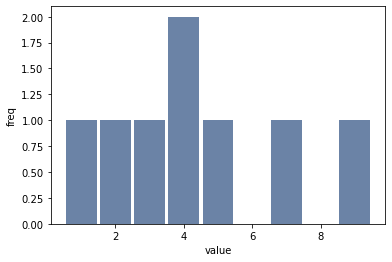

<Figure size 576x432 with 0 Axes>

In [ ]:
import thinkplot
thinkplot.Hist(hist,)
thinkplot.show(xlabel='value',ylabel='freq')

In [ ]:
import nsfg
preg=nsfg.ReadFemPreg()
live=preg[preg['outcome']==1]
live.head()
help(live)

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame)
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects.
 |  
 |      .. versionchanged:: 0.23.0
 |         If data is a dict, column order follows insertion-order for
 |         Python 3.6 and later.
 |  
 |      .. versionchanged:: 0.25.0
 |         If data is a list of dicts, column order follows insertion-order
 |         for Python 3.6 and later.
 |  
 |  index : Index or array-like
 |      Index to use for resulting frame. Will default to RangeIn

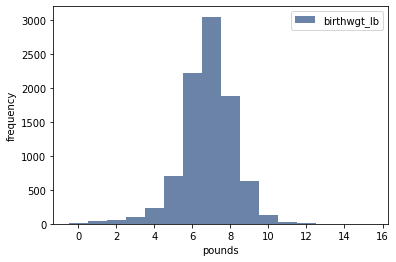

<Figure size 576x432 with 0 Axes>

In [ ]:
hist=thinkstats2.Hist(live.birthwgt_lb,label='birthwgt_lb')

thinkplot.hist(hist,width=1)
thinkplot.Show(xlabel='pounds', ylabel='frequency')


The distribution is approximately bell-shaped, which is the shape of the normal distribution, also called a Gaussian distribution. But unlike
a true normal distribution, this distribution is asymmetric; it has a tail that
extends farther to the left than to the right.

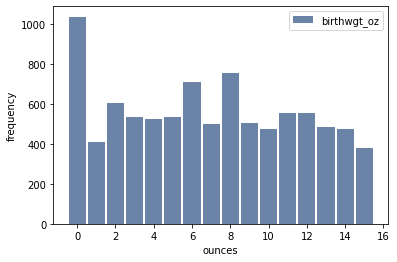

<Figure size 576x432 with 0 Axes>

In [ ]:
hist1=thinkstats2.Hist(live.birthwgt_oz,label='birthwgt_oz')

thinkplot.hist(hist1)
thinkplot.Show(xlabel='ounces', ylabel='frequency')

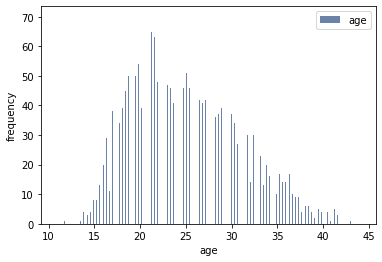

<Figure size 576x432 with 0 Axes>

In [ ]:
hist2=thinkstats2.Hist(live.agepreg,label='age')

thinkplot.hist(hist2,width=0.02)
thinkplot.Show(xlabel='age', ylabel='frequency')

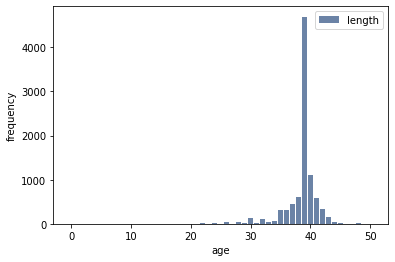

<Figure size 576x432 with 0 Axes>

In [ ]:
hist3=thinkstats2.Hist(live.prglngth,label='length')

thinkplot.hist(hist3)
thinkplot.Show(xlabel='age', ylabel='frequency')

In [ ]:
for weeks,freq in hist3.Smallest(10):
  print(weeks,freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


In [ ]:
for weeks,freq in hist3.Largest(10):
  print(weeks,freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


In this example, the motivating question is whether first babies tend to be
early (or late). When people ask this question, they are usually interested in
full-term pregnancies, so for this analysis I will focus on pregnancies longer
than 27 weeks.






1.   **caseid** is the integer ID of the respondent.
2.   **prglngth** is the integer duration of the pregnancy in weeks.
3.  **outcome** is an integer code for the outcome of the pregnancy. The code 1 indicates a live birth.
4.   **pregordr** is a pregnancy serial number; for example, the code for a
respondent’s first pregnancy is 1, for the second pregnancy is 2, and so
on.

5. **birthord** is a serial number for live births; the code for a respondent’s
first child is 1, and so on. For outcomes other than live birth, this field
is blank.
6.   **birthwgt_lb** and birthwgt_oz contain the pounds and ounces parts
of the birth weight of the baby.

7.  **agepreg** is the mother’s age at the end of the pregnancy.
8.   **finalwgt** is the statistical weight associated with the respondent. It is a floating-point value that indicates the number of people in the U.S.
population this respondent represents.














In [ ]:
firsts=live[live['pregordr']==1]
others=live[live['pregordr']!=1]
hist_1=thinkstats2.Hist(firsts.prglngth,'first')
hist_2=thinkstats2.Hist(others.prglngth,'other')

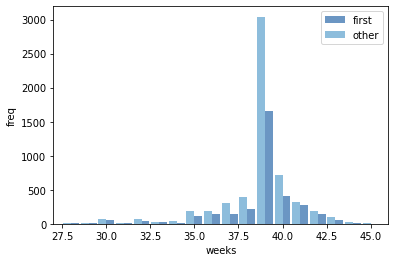

<Figure size 576x432 with 0 Axes>

In [ ]:

thinkplot.preplot(2)
thinkplot.Hist(hist_1,align='left',width=0.45)
thinkplot.Hist(hist_2,align='right',width=0.45)
thinkplot.show(xlabel='weeks',ylabel='freq',xlim=[27,46])

Histograms are useful because they make the most frequent values immediately apparent. But they are not the best choice for comparing two distributions. In this example, there are fewer “first babies” than “others,” so some
of the apparent differences in the histograms are due to sample sizes.

In [ ]:
live.prglngth.mean()

38.56055968517709

In [ ]:
live.prglngth.var()

7.302662067826851

In [ ]:
live.prglngth.std()

2.702343810070593

For all live births, the mean pregnancy length is 38.6 weeks, the standard
deviation is 2.7 weeks, which means we should expect deviations of 2-3 weeks
to be common.



 **Variance of pregnancy length is 7.3, which is hard to interpret, especially
since the units are weeks2
, or “square weeks.” Variance is useful in some
calculations, but it is not a good summary statistic.**

Cohen's d statistic is a way to convey the size of the effect is to compare the difference
between groups to the variability within groups
**d =(x1(bar) − x2(bar))/s**,where ¯x1 and ¯x2 are the means of the groups and s is the “pooled standard
deviation”.

In [ ]:
import math
def CohenEffect(group1,group2):
  mean1= group1.mean()
  mean2=group2.mean()
  var1=group1.var()
  var2=group2.var()
  n1,n2=len(group1),len(group2)
  v=(n1*var1+n2*var2)/(n1+n2)
  
  d=(mean1-mean2)/math.sqrt(v)
  return d
d=CohenEffect(firsts.prglngth,others.prglngth)
d
x=firsts.prglngth.mean()
y=others.prglngth.mean()
v1=firsts.prglngth.var()
v2=others.prglngth.var()
n1,n2=len(firsts.prglngth),len(others.prglngth)
v=(n1*v1+n2*v2)/(n1+n2)
s=(x-y)/math.sqrt(v)
s

0.013917193833550544

In [ ]:
hist1=thinkstats2.Hist(live.birthwgt_oz,label='birthwgt_oz')
hist1.Values()

dict_keys([0.0, 8.0, 6.0, 2.0, 11.0, 12.0, 5.0, 3.0, 4.0, 9.0, 7.0, 13.0, 10.0, 14.0, 1.0, 15.0])

In [ ]:
def mode(hist):
  m={}
  max=0
  z=hist.Values()
  for i in z:
    m[i]=hist.Freq(i) 
  for i in m:
    if m[i]>max:
      max=m[i]
    
  for key, value in m.items():
    if value==max:
      return key
print(mode(hist1))

0.0


In [ ]:
def allmode(hist):
  max=0
  m={i:hist.Freq(i) for i in hist.Values()}    
  z={i:j for (i,j) in sorted(m.items(),key=lambda item:item[1],reverse=True)}
  return(z)
print(allmode(hist1))

{0.0: 1037, 8.0: 756, 6.0: 709, 2.0: 603, 11.0: 557, 12.0: 555, 5.0: 535, 3.0: 533, 4.0: 525, 9.0: 505, 7.0: 501, 13.0: 487, 10.0: 475, 14.0: 475, 1.0: 408, 15.0: 378}


In [ ]:
firsts1=live.totalwgt_lb[live['pregordr']==1]
others1=live.totalwgt_lb[live['pregordr']!=1]

mean11=firsts1.mean()
mean12=others1.mean()
print(mean11,mean12)
CohenEffect(others1,firsts1)

7.204107733975324 7.301399825021872


0.06911936019885215

In [ ]:
n = hist.Total()
d = {}
for x, freq in hist.Items():
  print(x)
  d[x] = freq / n

7.0
6.0
8.0
5.0
9.0
4.0
10.0
3.0
2.0
1.0
11.0
12.0
0.0
13.0
14.0
15.0


In [ ]:
n=hist.Total()
d={}
for val,freq in hist.Items():
  d[val]=freq/n
d
e=thinkstats2.Pmf(hist)
e.Prob(7)
pmf = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf1=pmf
t=pmf.Mean()
pmf.Incr(2, 0.2)
pmf.Total()
pmf.Mult(2,0.5)
pmf[2]
a=pmf.Total()
b=pmf.Normalize()
print(pmf1)
print(pmf)


Pmf({1: 0.22222222222222224, 2: 0.33333333333333337, 3: 0.22222222222222224, 5: 0.22222222222222224})
Pmf({1: 0.22222222222222224, 2: 0.33333333333333337, 3: 0.22222222222222224, 5: 0.22222222222222224})


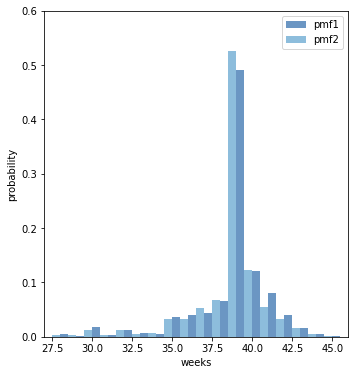

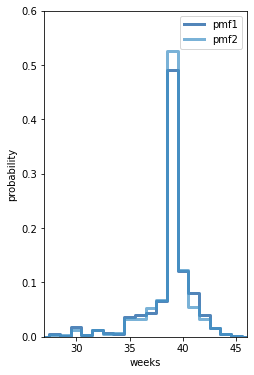

<Figure size 576x432 with 0 Axes>

In [ ]:
firsts_pmf=thinkstats2.Pmf(firsts.prglngth,label='pmf1')
others_pmf=thinkstats2.Pmf(others.prglngth,label='pmf2')
thinkplot.preplot(2,cols=2)
thinkplot.Hist(firsts_pmf,align='left',width=0.5)
thinkplot.Hist(others_pmf,align='right',width=0.5)
thinkplot.show(xlabel='weeks',ylabel='probability',axis=[27,46,0,0.6])
thinkplot.preplot(2)
thinkplot.subplot(2)
thinkplot.Pmfs([firsts_pmf,others_pmf])
thinkplot.show(xlabel='weeks',ylabel='probability',axis=[27,46,0,0.6])


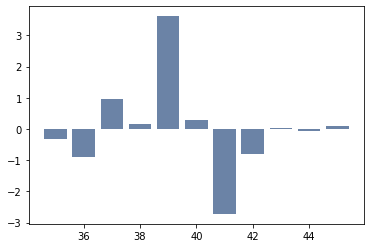

In [ ]:
weeks=range(35,46)
diffs=[]
for week in weeks:
  p1=firsts_pmf.Prob(week)
  p2=others_pmf.Prob(week)
  diffs.append((p2-p1)*100)
thinkplot.Bar(weeks,diffs)

In [ ]:
d = { 7: 8, 12: 8, 17: 14, 22: 4,
27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }
pmf = thinkstats2.Pmf(d, label='actual')
print('mean', pmf.Mean())
pmf


mean 23.692307692307693


Pmf({7: 0.12307692307692308, 12: 0.12307692307692308, 17: 0.2153846153846154, 22: 0.06153846153846154, 27: 0.09230769230769231, 32: 0.18461538461538463, 37: 0.12307692307692308, 42: 0.046153846153846156, 47: 0.03076923076923077}, 'actual')

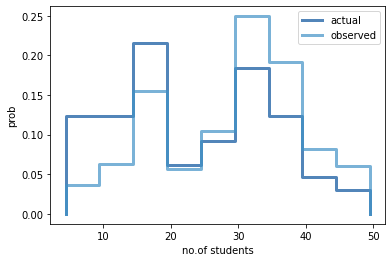

Pmf({7: 0.03636363636363637, 12: 0.062337662337662345, 17: 0.15454545454545457, 22: 0.05714285714285715, 27: 0.1051948051948052, 32: 0.24935064935064938, 37: 0.1922077922077922, 42: 0.08181818181818183, 47: 0.061038961038961045}, 'observed')

<Figure size 576x432 with 0 Axes>

In [ ]:
def BiasedPmf(pmf,label):
  new_pmf=pmf.Copy(label=label)
  for x,p in pmf.Items():
    new_pmf.Mult(x,x)

  new_pmf.Normalize()
  return new_pmf
biasedpmf=BiasedPmf(pmf,label='observed')
thinkplot.preplot(2)
thinkplot.Pmfs([pmf,biasedpmf])
thinkplot.Show(xlabel='no.of students',ylabel='prob')
biasedpmf

In [ ]:
def percentilerank(scores,your_score):
  count=0
  for score in scores:
    if score<=your_score:
      count+=1
    
  percentile_rank=100*count/len(scores)
  return percentile_rank


In [ ]:
def percentile(percentile_rank,scores):
  scores.sort()
  for score in scores:
    if percentilerank(scores,score)>=percentile_rank:
      return score

In [ ]:
def percentile2(scores,percentile_rank):
  scores.sort()
  index=percentile_rank*(len(scores)-1)//100
  return scores[index]

In [ ]:
x=[55,66,77,88,99]
y=88
percentilerank(x,y)

80.0

In [ ]:
percentile(80,x)

88

In [ ]:
z=80
percentile2(x,z)

88

In [ ]:
import analytic
df=analytic.ReadBabyBoom()
df

,time,sex,weight_g,minutes
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177
5,405,1,2208,245
6,407,1,1745,247
7,422,2,2846,262
8,431,2,3166,271
9,708,2,3520,428


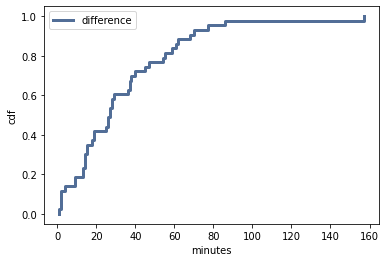

<Figure size 576x432 with 0 Axes>

In [ ]:
diffs = df.minutes.diff()
diffs
cdf=thinkstats2.Cdf(diffs,label='difference')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='minutes',ylabel='cdf')

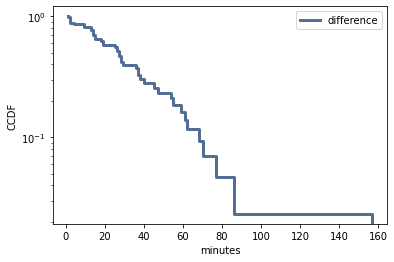

<Figure size 576x432 with 0 Axes>

In [ ]:
thinkplot.Cdf(cdf,complement=True)
thinkplot.Show(xlabel='minutes',
ylabel='CCDF',
yscale='log')

 It is not exactly straight, which indicates
that the exponential distribution is not a perfect model for this data. Most
likely the underlying assumption—that a birth is equally likely at any time
of day—is not exactly true.

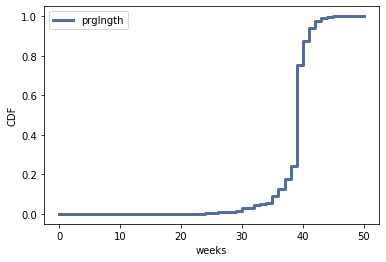

<Figure size 576x432 with 0 Axes>

In [ ]:

cdf = thinkstats2.Cdf(live.prglngth, label='prglngth')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='weeks', ylabel='CDF')

The Cdf constructor can take as an argument a list of values, a pandas
Series, a Hist, Pmf, or another Cdf. The following code makes a Cdf for the
distribution of pregnancy lengths in the NSFG:


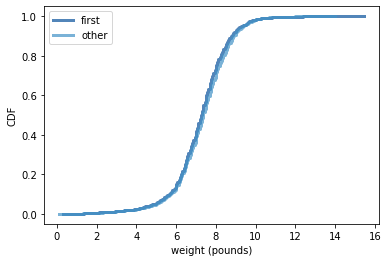

<Figure size 576x432 with 0 Axes>

In [ ]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')
thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Show(xlabel='weight (pounds)', ylabel='CDF')

We can see that first babies are slightly lighter throughout the distribution,
with a larger discrepancy above the mean

In [ ]:
import scipy.stats
scipy.stats.norm.cdf(0)
scipy.stats.norm.cdf(0,loc=[0,2])

array([0.5       , 0.02275013])

In [ ]:
first_cdf1=thinkstats2.Cdf(live.birthwgt_lb,label='original')
second_cdf2=thinkstats2.EvalNormalCdf(x,mu=live.birthwgt_lb.mean(),sigma=live.birthwgt_lb.std())
thinkplot.PrePlot(2)
##thinkplot.Cdf(second_cdf2)
##thinkplot.Show(xlabel='weight',ylabel='cdf')

<Figure size 432x288 with 0 Axes>

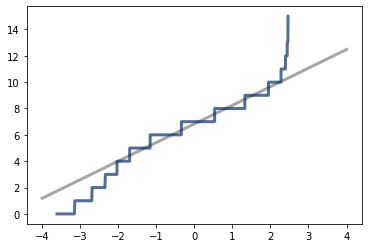

In [ ]:
def MakeNormalPlot(weights):
  mean = weights.mean()
  std = weights.std()
  xs = [-4, 4]
  fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
  thinkplot.Plot(fxs, fys, color='gray', label='model')
  xs, ys = thinkstats2.NormalProbability(weights)
  thinkplot.Plot(xs, ys, label='birth weights')
MakeNormalPlot(live.birthwgt_lb)